In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import chart_studio.plotly as py
import plotly.express as px

import plotly.graph_objects as go 
plt.rcParams['figure.figsize']=17,8

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot,download_plotlyjs

import folium 

import warnings
warnings.filterwarnings('ignore')
import requests

import json

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
r = requests.get("https://api.covid19api.com/summary")
data = json.loads(r.text)
json_data = json.dumps(data['Countries'])

In [8]:
covid_world=pd.read_json(json_data, orient='records')
covid_world
#covid_world.iplot(kind='bar',x='Country',y='TotalConfirmed')

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,276,4963,5,127,52,610,2020-05-13 20:24:25+00:00
1,Albania,AL,albania,4,876,0,31,28,682,2020-05-13 20:24:25+00:00
2,Algeria,DZ,algeria,176,6067,8,515,157,2998,2020-05-13 20:24:25+00:00
3,Andorra,AD,andorra,3,758,0,48,18,568,2020-05-13 20:24:25+00:00
4,Angola,AO,angola,0,45,0,2,0,13,2020-05-13 20:24:25+00:00
...,...,...,...,...,...,...,...,...,...,...
180,Viet Nam,VN,vietnam,0,288,0,0,3,252,2020-05-13 20:24:25+00:00
181,Western Sahara,EH,western-sahara,0,6,0,0,0,6,2020-05-13 20:24:25+00:00
182,Yemen,YE,yemen,9,65,1,10,0,1,2020-05-13 20:24:25+00:00
183,Zambia,ZM,zambia,174,441,0,7,0,117,2020-05-13 20:24:25+00:00


In [61]:
#fig=px.density_mapbox(covid_world,lat="Lat",lon="Long",hover_name="Country",hover_data=["TotalConfirmed","TotalDeaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
#fig.update_layout(title='Worldwide Corona Virus Cases')
#fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


In [11]:
r = requests.get("https://api.covid19india.org/data.json")
data =json.loads(r.text)
json_data = json.dumps(data['statewise'])

In [12]:
covid_india=pd.read_json(json_data, orient='records')

In [15]:
covid_india.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
0,49099,78055,2551,3725,136,1946,14/05/2020 01:13:23,26400,Total,TT,
1,19400,25922,975,1495,54,422,14/05/2020 01:13:24,5547,Maharashtra,MH,[10-May]<br>\n- Total numbers are updated to t...
2,5140,9268,566,364,29,316,13/05/2020 20:33:34,3562,Gujarat,GJ,
3,6987,9227,64,509,3,42,13/05/2020 20:33:35,2176,Tamil Nadu,TN,
4,5034,7998,106,359,20,346,13/05/2020 11:13:23,2858,Delhi,DL,[10-May]<br>\n\nDelhi will be releasing bullet...


In [14]:
covid_india.shape

(38, 11)

In [16]:
covid_india.keys()

Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'recovered', 'state', 'statecode',
       'statenotes'],
      dtype='object')

In [17]:
covid_india.tail()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
33,0,1,0,0,0,0,12/05/2020 23:23:25,1,Dadra and Nagar Haveli and Daman and Diu,DN,
34,0,0,0,0,0,0,20/04/2020 08:45:07,0,Nagaland,NL,
35,0,0,0,0,0,0,26/03/2020 07:19:29,0,Daman and Diu,DD,
36,0,0,0,0,0,0,26/03/2020 07:19:29,0,Lakshadweep,LD,
37,0,0,0,0,0,0,26/03/2020 07:19:29,0,Sikkim,SK,


In [13]:
covid_india = covid_india.reindex(columns=['state','statecode','lastupdatedtime',
                                           'confirmed','active','recovered','deaths'
                                           ,'deltaconfirmed','deltadeaths','deltarecovered','statenotes'])

In [14]:
covid_india

,state,statecode,lastupdatedtime,confirmed,active,recovered,deaths,deltaconfirmed,deltadeaths,deltarecovered,statenotes
0,Total,TT,13/05/2020 23:51:23,78055,49099,26400,2551,3725,136,1946,
1,Maharashtra,MH,13/05/2020 20:33:33,25922,19400,5547,975,1495,54,422,[10-May]<br>\n- Total numbers are updated to t...
2,Gujarat,GJ,13/05/2020 20:33:34,9268,5140,3562,566,364,29,316,
3,Tamil Nadu,TN,13/05/2020 20:33:35,9227,6987,2176,64,509,3,42,
4,Delhi,DL,13/05/2020 11:13:23,7998,5034,2858,106,359,20,346,[10-May]<br>\n\nDelhi will be releasing bullet...
5,Rajasthan,RJ,13/05/2020 22:23:28,4328,1634,2573,121,202,4,119,
6,Madhya Pradesh,MP,13/05/2020 19:33:25,4173,1937,2004,232,187,7,144,
7,Uttar Pradesh,UP,13/05/2020 22:53:24,3758,1707,1965,86,94,4,92,
8,West Bengal,WB,13/05/2020 21:23:24,2290,1381,702,207,117,9,90,- Cases updated as per WB bulletin as it now p...
9,Andhra Pradesh,AP,13/05/2020 11:54:24,2137,948,1142,47,48,1,86,


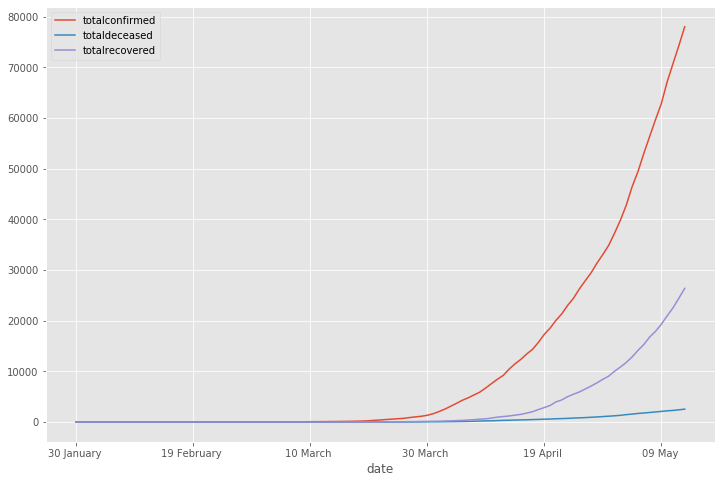

In [15]:
url = "https://api.covid19india.org/data.json"
response = requests.get(url)
json_data= response.text
data = json.loads(response.text)
json_data = json.dumps(data['cases_time_series'])

df=pd.read_json(json_data)
ax=plt.gca()

df.plot(x='date',y='totalconfirmed',grid=True,figsize=(12,8),ax=ax)
df.plot(x='date',y='totaldeceased',grid=True,figsize=(12,8),ax=ax)
df.plot(x='date',y='totalrecovered',grid=True,figsize=(12,8),ax=ax)

ax.grid(linestyle='-', linewidth='0.5', which='minor')

In [60]:
import json

state = input("Enter state name to know the number of cases of novel coronavirus: ")

api = "https://api.covid19india.org/data.json"
response = requests.get(api)

data = json.loads(response.text)

statewise_data = data["statewise"]

states = []

for state_data in statewise_data:
    states.append(state_data["state"].lower())
        
if state.lower() in states:
    for state_data in statewise_data:
        if state_data["state"].lower() == state.lower():
            print(f'\nCases of novel coronavirus in {state_data["state"]}\n')
            print(f'Confirmed: {state_data["confirmed"]}')
            print(f'Active: {state_data["active"]}')
            print(f'Recovered: {state_data["recovered"]}')
            print(f'Deceased: {state_data["deaths"]}')
            break
else:
    print(f'Sorry, we couldn\'t find the number of cases of novel coronavirus in {state}')

Enter state name to know the number of cases of novel coronavirus: delhi

Cases of novel coronavirus in Delhi

Confirmed: 7998
Active: 5034
Recovered: 2858
Deceased: 106


In [17]:
data = dict(type='choropleth',
            locations = covid_india['statecode'],
            locationmode = 'IN',
            colorscale = 'Reds',
            text =covid_india['state'],
            z = covid_india['confirmed'],
            colorbar = {'title':"Confirm cases"}
            )

In [18]:
layout = dict(title = 'CONFIRM CASES OF COVID IN INDIA',
              geo = dict(scope='asia')
             )

In [19]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'IN'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']

In [31]:
covid_india=covid_india.drop([0])

In [32]:
covid_india['confirmed'].sum()

78055

In [33]:
covid19=covid_india[['state','confirmed','active','recovered','deaths']]

In [34]:
covid19.style.background_gradient(cmap='Reds')

,state,confirmed,active,recovered,deaths
1,Maharashtra,25922,19400,5547,975
2,Gujarat,9268,5140,3562,566
3,Tamil Nadu,9227,6987,2176,64
4,Delhi,7998,5034,2858,106
5,Rajasthan,4328,1634,2573,121
6,Madhya Pradesh,4173,1937,2004,232
7,Uttar Pradesh,3758,1707,1965,86
8,West Bengal,2290,1381,702,207
9,Andhra Pradesh,2137,948,1142,47
10,Punjab,1924,1692,200,32


In [35]:
covid19_active=covid19[['state','confirmed']]
covid19=covid19_active.sort_values(by='state',ascending=True)
covid19

,state,confirmed
26,Andaman and Nicobar Islands,33
9,Andhra Pradesh,2137
32,Arunachal Pradesh,1
23,Assam,80
14,Bihar,953
18,Chandigarh,191
24,Chhattisgarh,59
33,Dadra and Nagar Haveli and Daman and Diu,1
35,Daman and Diu,0
4,Delhi,7998


In [36]:
covid19_active=covid19_active.sort_values(by='confirmed',ascending=False)

In [37]:
covid19_active.style.background_gradient(cmap='Reds')


,state,confirmed
1,Maharashtra,25922
2,Gujarat,9268
3,Tamil Nadu,9227
4,Delhi,7998
5,Rajasthan,4328
6,Madhya Pradesh,4173
7,Uttar Pradesh,3758
8,West Bengal,2290
9,Andhra Pradesh,2137
10,Punjab,1924


In [38]:
covid19.iplot(kind='bar',x='state',y='confirmed')

In [39]:
covid19.iplot(kind='scatter',x='state',y='confirmed',mode='markers+lines',title="Confirmed Cases in INDIA"
              ,xTitle='Name of the states',yTitle='Total cases',colors='red',size=15)

In [40]:
india_cor=pd.read_excel('Indian Coordinates.xlsx')

In [41]:
india_cor

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [42]:
india_cor.rename({"Name of State / UT":"state"},axis='columns',inplace=True)

In [43]:
covid19_full=pd.merge(india_cor,covid19,on='state')
covid19_full

,state,Latitude,Longitude,confirmed
0,Andhra Pradesh,14.750429,78.570026,2137
1,Delhi,28.669993,77.230004,7998
2,Haryana,28.450006,77.019991,793
3,Karnataka,12.570381,76.919997,959
4,Kerala,8.900373,76.569993,535
5,Maharashtra,19.250232,73.160175,25922
6,Punjab,31.519974,75.980003,1924
7,Rajasthan,26.449999,74.639981,4328
8,Tamil Nadu,12.920386,79.150042,9227
9,Uttar Pradesh,27.599981,78.050006,3758


In [58]:
map=folium.Map(location=[20,90],zoom_start=6,tiles='Stamenterrain')

for lat,long,value, name in zip(covid19_full['Latitude'],covid19_full['Longitude'],
                                covid19_full['confirmed'],covid19_full['state']):
    folium.CircleMarker([lat,long],radius=value*0.01,popup
                        =('<strong>State</strong>: '+str(name).capitalize()
                                             +'<br>''<strong>Total Cases</strong>: ' 
                                             + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.1).add_to(map)

In [59]:
map

In [80]:
time=covid_india.sort_values(by='confirmed',ascending=True)
time.iplot(kind='scatter',y='confirmed',x='lastupdatedtime',mode='markers+lines',
           title="Confirmed Cases in INDIA",xTitle='Name of the states',yTitle='Total cases',colors='red',size=12)

In [81]:
r = requests.get("https://api.apify.com/v2/key-value-stores/moxA3Q0aZh5LosewB/records/LATEST?disableRedirect=true")
data =json.loads(r.text)
json_data = json.dumps(data['casesByState'])

In [82]:
covid_us=pd.read_json(json_data, orient='records')
covid_us

,name,range,casesReported,communityTransmission
0,Alabama,"10,001 to 20,000",10413,"Yes, widespread"
1,Alaska,"0 to 1,000",381,"Yes, defined area(s)"
2,American Samoa,"0 to 1,000",0,N/A
3,Arizona,"10,001 to 20,000",11380,"Yes, widespread"
4,Arkansas,"1,001 to 5,000",4043,"Yes, widespread"
5,California,"40,001 or more",67939,"Yes, widespread"
6,Colorado,"10,001 to 20,000",19735,"Yes, widespread"
7,Connecticut,"20,001 to 40,000",33765,"Yes, widespread"
8,Delaware,"5,001 to 10,000",6741,"Yes, widespread"
9,District of Columbia,"5,001 to 10,000",6389,Undetermined


In [83]:
covid_us.iplot(kind='bar',x='name',y='casesReported')